BASIc Example 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble
from qiskit import QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.circuit.library import RYGate
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler
from qiskit.primitives import Estimator
from scipy.optimize import curve_fit

In [2]:
# This code demonstrates how to create a simple quantum circuit using Qiskit,
# apply quantum gates, and visualize the results using matplotlib.

# Step 1: Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

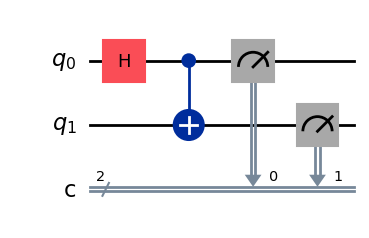

In [3]:
# Step 2: Apply quantum gates
qc.h(0)            # Hadamard on qubit 0
qc.cx(0, 1)        # CNOT from qubit 0 to qubit 1
qc.measure([0, 1], [0, 1])  # Measure both qubits

# Optional: Draw the circuit
qc.draw('mpl')  # Use 'mpl' for matplotlib or 'text' for ASCII version

In [4]:
# Step 3: Use AerSimulator to simulate the circuit
simulator = AerSimulator()
qc = transpile(qc, simulator)  # Transpile for AerSimulator

In [5]:
# Step 4: Run with Sampler primitive
sampler = Sampler()
job = sampler.run(qc)
result = job.result()

C:\Users\prajj\AppData\Local\Temp\ipykernel_19772\3368590486.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


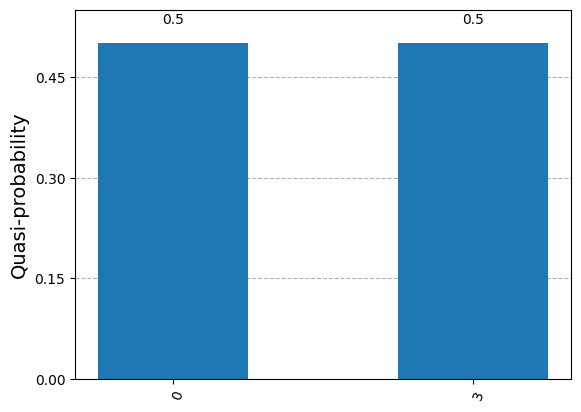

In [6]:
# Step 5: Extract and plot results
counts = result.quasi_dists[0]  # Dictionary of measurement outcomes
plot_histogram(counts)